#### (API):

1- Data source:weatherbit.io

2- Url for the source: http://api.weatherapi.com/v1

 Using the weather api, I will observe how different the weather is in cities all over the globe as we are in different seasons at the same time. I have chosen a day of the year, 2023-10-07, and I will observe how the temperature, precipitation and humidity varies all around the world. 



#### 1. a.  Data collection code:

1- Briefly describe your data collection code source (class, online, self-created): 
The source for my data collection code is taken from the examples in the api as well as code from class that I have adapted to fit my data.


In [122]:
import requests as rq

# Base url call to request data http://api.weatherapi.com/v1/current.json
#API endpoint: 
# my api key = c8d2cdc9d68f43339c4224833230710
#lat	required	Latitude of Hithadhoo, decimal -0.630099 
#lon	required	Longitude of Hithadhoo, decimal (73.158563)
#The longtitude and latitude values will be changed to observe weather in different cities around the world.
#dt	required	Date in the `YYYY-MM-DD` format for which data is requested 2010-06-15, 2011-06-15

#Below I will derive the information I need for the first city I am observing, Hithadhoo, maldives

r = rq.get('http://api.weatherapi.com/v1/current.json?key=c8d2cdc9d68f43339c4224833230710&q=-0.630099,73.158563&dt=2023-10-07')

# check the status: 200 means success, 4xx means error
print(r.status_code)
           
# view the raw response text
print(r.text)
print('\n')

# decode the JSON response body into a dictionary
print(r.json())
print('\n')



200
{"location":{"name":"Hithadhoo","region":"Seenu","country":"Maldives","lat":-0.63,"lon":73.16,"tz_id":"Indian/Maldives","localtime_epoch":1696732642,"localtime":"2023-10-08 7:37"},"current":{"last_updated_epoch":1696732200,"last_updated":"2023-10-08 07:30","temp_c":26.9,"temp_f":80.3,"is_day":1,"condition":{"text":"Light rain shower","icon":"//cdn.weatherapi.com/weather/64x64/day/353.png","code":1240},"wind_mph":11.4,"wind_kph":18.4,"wind_degree":124,"wind_dir":"SE","pressure_mb":1012.0,"pressure_in":29.89,"precip_mm":1.7,"precip_in":0.07,"humidity":82,"cloud":76,"feelslike_c":30.2,"feelslike_f":86.4,"vis_km":10.0,"vis_miles":6.0,"uv":6.0,"gust_mph":17.1,"gust_kph":27.6}}


{'location': {'name': 'Hithadhoo', 'region': 'Seenu', 'country': 'Maldives', 'lat': -0.63, 'lon': 73.16, 'tz_id': 'Indian/Maldives', 'localtime_epoch': 1696732642, 'localtime': '2023-10-08 7:37'}, 'current': {'last_updated_epoch': 1696732200, 'last_updated': '2023-10-08 07:30', 'temp_c': 26.9, 'temp_f': 80.3, 'i

In [167]:
# Now I will extract the temperature, humidity and precipitation from the dictionary. The precipiation is in milimiters and 
#temperature is in celcius. They are all inside the top level key- current. 
data = r.json()  

# Access temperature value in Celsius
temperature_celsius = data['current']['temp_c']

# Access humidity in g/m^3
humidity = data['current']['humidity']

# Access precipitation value in millimeters
precipitation_mm = data['current']['precip_mm']

print("Temperature (Celsius):", temperature_celsius)
print("Humidity (g/m^3):", humidity)
print("Precipitation (mm):", precipitation_mm)


Temperature (Celsius): 26.9
Humidity (g/m^3): 82
Precipitation (mm): 1.7


In [168]:
# Now I will define  functions to return the  precipitation, humidity and temperature values for different cities
#using latitude and longtitude values

def get_precip(lat_long):
    r = rq.get('http://api.weatherapi.com/v1/current.json?key=c8d2cdc9d68f43339c4224833230710&q='+lat_long+'&dt=2023-10-07')
    data= r.json()
    precipitation_mm = data['current']['precip_mm']
    return float(precipitation_mm)

def get_humidity(lat_long):
    r = rq.get('http://api.weatherapi.com/v1/current.json?key=c8d2cdc9d68f43339c4224833230710&q='+lat_long+'&dt=2023-10-07')
    data= r.json()
    humidity = data['current']['humidity']
    return float(temperature_celsius)   

# Function to get temperature
def get_temp(lat_long):
    r = rq.get('http://api.weatherapi.com/v1/current.json?key=c8d2cdc9d68f43339c4224833230710&q='+lat_long+'&dt=2023-10-07')
    data = r.json()
    temperature_celsius = data['current']['temp_c']
    return float(temperature_celsius)

# Function to get city
def get_city(lat_long):
    r = rq.get('http://api.weatherapi.com/v1/current.json?key=c8d2cdc9d68f43339c4224833230710&q='+lat_long+'&dt=2023-10-07')
    data = r.json()
    city = data['location']['name']
    country = data['location']['country']
    return str(city), str(country)

lat_long= ["-0.630099,73.158563", "51.509865,-0.118092", "25.276987,55.296249","6.465422,3.406448", "-22.908333,-43.196388",
          "-26.195246,28.034088", "35.652832,139.839478", "55.75222,37.61556", "43.651070,-79.347015", "19.432608,-99.133209",
          "-37.840935,144.946457", "36.737232, 3.086472", "19.076090,72.877426", "-10.174240,149.944153", "-34.603722,-58.381592",
          "40.730610,-73.935242", "37.773972,-122.431297", "52.2449,21.0119", " -1.286389,36.817223", "66.160507,-153.369141"]


    
for coordinates in lat_long:
    print(get_precip(coordinates))
    
for coordinates in lat_long:
    print(get_temp(coordinates))
for coordinates in lat_long:
    print(get_humidity(coordinates))

for coordinates in lat_long:
    print(get_city(coordinates))

0.4
0.0
0.0
1.24
1.29
0.0
0.0
0.03
0.0
0.0
0.0
0.0
0.0
0.06
0.0
0.0
0.0
0.0
0.0
0.0
27.0
13.0
30.0
25.0
24.0
15.0
21.0
5.0
10.0
17.0
17.0
16.0
29.0
27.0
19.0
12.2
20.0
10.0
15.0
-4.1
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
26.9
('Hithadhoo', 'Maldives')
('London', 'United Kingdom')
('Dubai', 'United Arab Emirates')
('Lagos', 'Nigeria')
('Rio De Janeiro', 'Brazil')
('Johannesburg', 'South Africa')
('Urayasu', 'Japan')
('Moscow', 'Russia')
('Toronto', 'Canada')
('Mexico City', 'Mexico')
('Port Melbourne', 'Australia')
('Algiers', 'Algeria')
('Bombay', 'India')
('Kiwarai', 'Papua New Guinea')
('San Isidro', 'Argentina')
('Weehawken', 'United States of America')
('San Francisco', 'United States of America')
('Warsaw', 'Poland')
('Nairobi', 'Kenya')
('Hughes', 'United States of America')


#### 1.b. Store your data into data frame:

In [169]:
# Code for storing data into data frame

import pandas as pd

# Initialize empty lists to store data
name_data=[]
precip_data = []
humidity_data=[]
temp_data = []


# Loop through the coordinates and fetch data
for coordinates in lat_long:
    name_data.append(get_city(coordinates))
    precip_data.append(get_precip(coordinates))
    humidity_data.append(get_humidity(coordinates))
    temp_data.append(get_temp(coordinates))


# Create a data frame 
data = {
    "City": name_data,
    "Precipitation": precip_data,
    "Humidity": humidity_data,
    "Temperature": temp_data
}

df = pd.DataFrame(data)

# Display the data frame
print(df)

                                         City  Precipitation  Humidity  \
0                       (Hithadhoo, Maldives)           0.40      26.9   
1                    (London, United Kingdom)           0.00      26.9   
2               (Dubai, United Arab Emirates)           0.00      26.9   
3                            (Lagos, Nigeria)           1.24      26.9   
4                    (Rio De Janeiro, Brazil)           1.29      26.9   
5                (Johannesburg, South Africa)           0.00      26.9   
6                            (Urayasu, Japan)           0.00      26.9   
7                            (Moscow, Russia)           0.03      26.9   
8                           (Toronto, Canada)           0.00      26.9   
9                       (Mexico City, Mexico)           0.00      26.9   
10                (Port Melbourne, Australia)           0.00      26.9   
11                         (Algiers, Algeria)           0.00      26.9   
12                            (Bombay,

#### 1.c. Run basic statistics on the converted data (same as hw1- Q20):
1. Mean  
2. Maximum  
3. Minimum  
4. Standard deviation  
5. Median  
6. 25th percentile  
7. 75th percentile



In [170]:
# Code for basic statisitcs  
import numpy as np

mean_precip = np.mean(precip_data)
max_precip = np.max(precip_data)
min_precip = np.mean(precip_data)
std_deviation = np.std(precip_data)
median_precip = np.median(precip_data)
percentile_25 = np.percentile(precip_data, 25)
percentile_75 = np.percentile(precip_data, 75)

# Print the results
print("Basic Statistics for Precipitation:")
print(f"Mean precipitation: {mean_precip:.2f} mm")
print(f"Max precipitation: {max_precip:.2f} mm")
print(f"Min precipitation: {min_precip:.2f} mm")
print(f"Standard Deviation: {std_deviation:.2f} mm")
print(f"Median precipitation: {median_precip:.2f} mm")
print(f"25th Percentile: {percentile_25:.2f} mm")
print(f"75th Percentile: {percentile_75:.2f} mm")

mean_humidity = np.mean(humidity_data)
max_humidity = np.max(humidity_data)
min_humidity = np.mean(humidity_data)
std_deviation = np.std(humidity_data)
median_humidity = np.median(humidity_data)
percentile_25 = np.percentile(humidity_data, 25)
percentile_75 = np.percentile(humidity_data, 75)

print('\n')

# Print the results
print("Basic Statistics for Humidity:")
print(f"Mean humidity: {mean_humidity:.2f} g/m^3")
print(f"Max humidity: {max_humidity:.2f} g/m^3")
print(f"Min humidity: {min_humidity:.2f} g/m^3")
print(f"Standard Deviation: {std_deviation:.2f} g/m^3")
print(f"Median humidity: {median_humidity:.2f} g/m^3")
print(f"25th Percentile: {percentile_25:.2f} g/m^3")
print(f"75th Percentile: {percentile_75:.2f} g/m^3")


mean_temp = np.mean(temp_data)
max_temp = np.max(temp_data)
min_temp = np.mean(temp_data)
std_deviation = np.std(temp_data)
median_temp = np.median(temp_data)
percentile_25 = np.percentile(temp_data, 25)
percentile_75 = np.percentile(temp_data, 75)

print('\n')

# Print the results
print("Basic Statistics for Temperature:")
print(f"Mean temperature: {mean_temp:.2f} °C")
print(f"Max temperature: {max_temp:.2f} °C")
print(f"Min temperature: {min_temp:.2f} °C")
print(f"Standard Deviation: {std_deviation:.2f} °C")
print(f"Median temperature: {median_temp:.2f} °C")
print(f"25th Percentile: {percentile_25:.2f} °C")
print(f"75th Percentile: {percentile_75:.2f} °C")


Basic Statistics for Precipitation:
Mean precipitation: 0.15 mm
Max precipitation: 1.29 mm
Min precipitation: 0.15 mm
Standard Deviation: 0.38 mm
Median precipitation: 0.00 mm
25th Percentile: 0.00 mm
75th Percentile: 0.01 mm


Basic Statistics for Humidity:
Mean humidity: 26.90 g/m^3
Max humidity: 26.90 g/m^3
Min humidity: 26.90 g/m^3
Standard Deviation: 0.00 g/m^3
Median humidity: 26.90 g/m^3
25th Percentile: 26.90 g/m^3
75th Percentile: 26.90 g/m^3


Basic Statistics for Temperature:
Mean temperature: 17.40 °C
Max temperature: 30.00 °C
Min temperature: 17.40 °C
Standard Deviation: 8.33 °C
Median temperature: 17.00 °C
25th Percentile: 12.80 °C
75th Percentile: 24.25 °C


#### 1.d Visualize your data:
Describe your visualization by answering following questions:
1- Which chart type did you use to visualize your data?
2- Why did you choose this chart type?

1- I used a bar chart to visualise all my data 
2-  Bar charts are effective for comparing data points or categories. In this case, I have cities as categories, and I am comparing different attributes (precipitation, humidity, temperature) for each city.

Clarity: Bar charts provide a clear and straightforward way to represent data. Each bar represents a single category (city), and the height of the bar corresponds to the value being measured (e.g., precipitation amount).

Categorical Data: Bar charts are ideal for visualizing categorical data, where you have distinct categories without a continuous scale. In contrast to line charts or scatter plots, which are used for continuous data, bar charts are well-suited for my discrete city data.
Comparison Across Categories: Bar charts allow me compare values across different categories easily. I can visually identify which cities have higher or lower values for the variables I am observing.
##### NOTE: Your chart has to contain all necessary components (title, labels, legends, ...). 

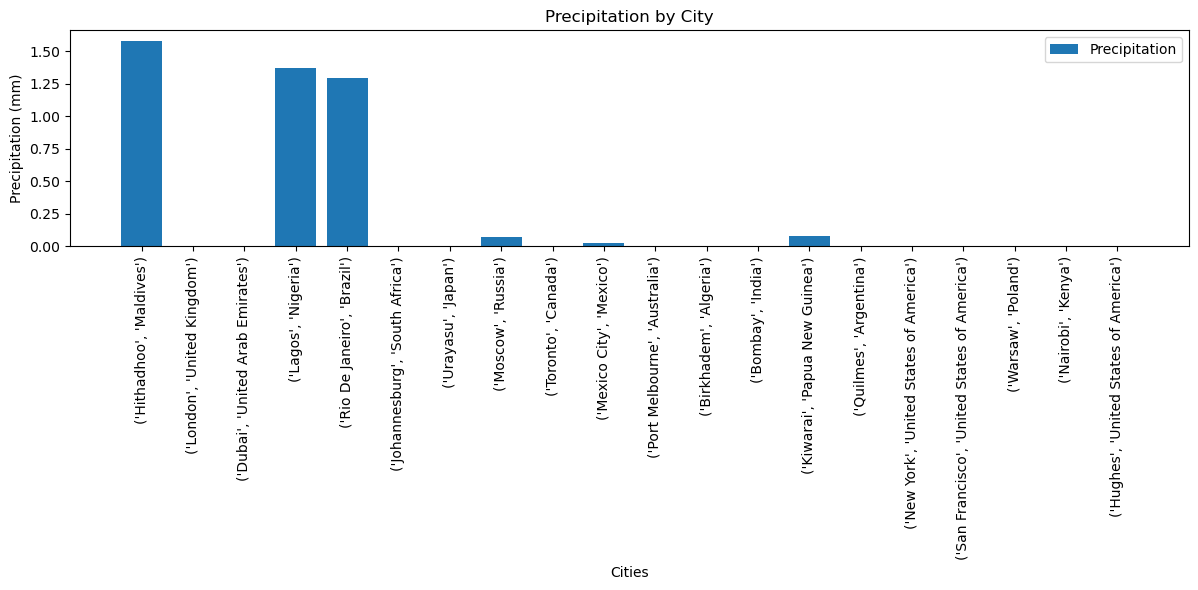

In [166]:
# Code for data visualization
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data frame as follows:
data = {
    "City": name_data,
    "Precipitation": precip_data,
    "Humidity": humidity_data,
    "Temperature": temp_data
}

df = pd.DataFrame(data)

# Create separate bar chart for  each variable

# Create a bar chart with cities on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(df["City"].astype(str), df["Precipitation"], label="Precipitation")
plt.xlabel("Cities")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation by City")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

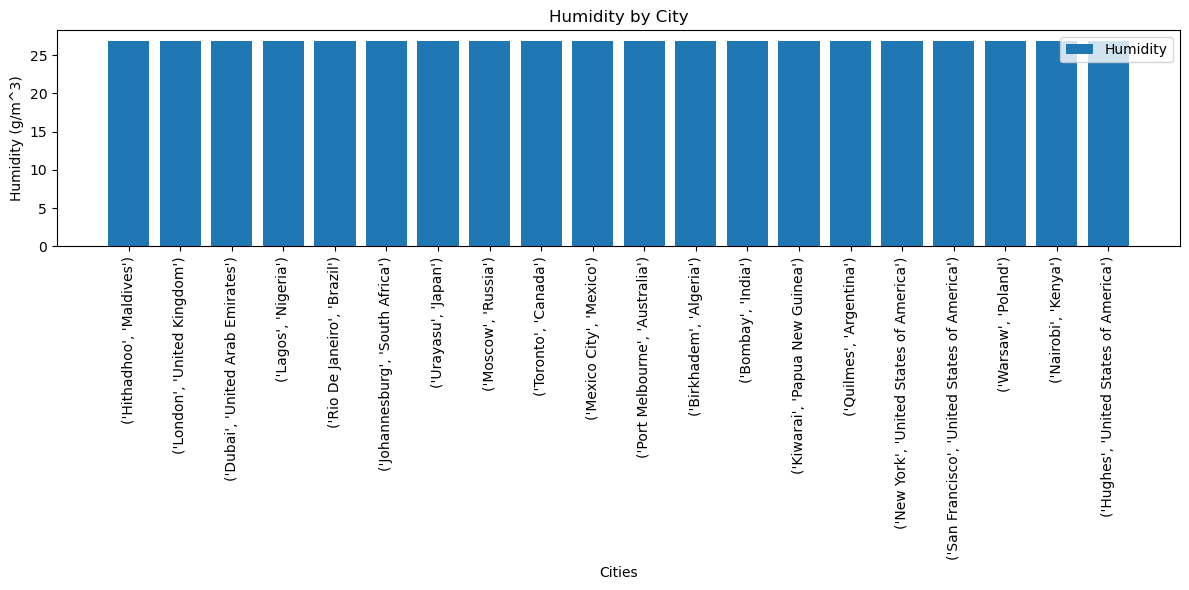

In [165]:
plt.figure(figsize=(12, 6))
plt.bar(df["City"].astype(str), df["Humidity"], label="Humidity")
plt.xlabel("Cities")
plt.ylabel("Humidity (g/m^3)")
plt.title("Humidity by City")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

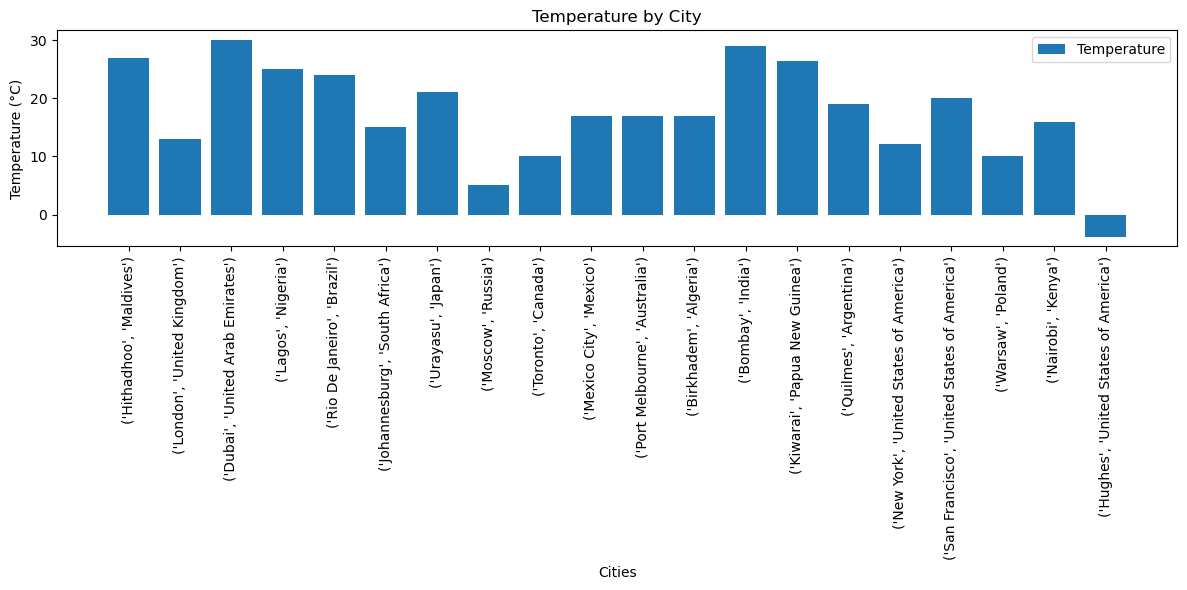

In [164]:
plt.figure(figsize=(12, 6))
plt.bar(df["City"].astype(str), df["Temperature"], label="Temperature")
plt.xlabel("Cities")
plt.ylabel("Temperature (°C)")
plt.title("Temperature by City")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

#### 2. a.  Data collection code:


#Code for data collection

### As a football fan, and more specifically a fan of the premier league, I thoght it would be interesting to compare the number of wins across different teams in the premiere league to   shed light on the competitiveness of the league. It can reveal whether certain teams have dominated the league for extended periodsor if there is a more even distribution of wins among various clubs. However, this did not go as planned as when I tried extracting this information, the premiere league website had viually hidden it so that I could only extract information regarding the wins for this specific 2023/24 season. So I will instead analyse how competitive the league has been so far this season

### 1. My data source is the premier league website
### 2. "https://www.premierleague.com/stats/top/clubs/wins?se=-1"
### 3. I will collect data that shows the each team that has played in the premiere league in its 31 year history and the number of wins they had.



In [77]:
#Code for data collection
import requests as rq

url = "https://www.premierleague.com/stats/top/clubs/wins?se=578"
page = rq.get(url)
    
print(page.text[:600])
print("Length is:",len(page.text[:600]))
  


<!DOCTYPE html>
<html lang="en">
<head>
    <meta name="twitter:title" content="Premier League Club Stats - Wins"/>
<meta name="description" content="View Wins played by Premier League clubs for 2018/19 and previous seasons, on the official website of the Premier League."/>
<meta name="twitter:description" content="View Wins played by Premier League clubs for 2018/19 and previous seasons, on the official website of the Premier League."/>
<meta property="og:title" content="Premier League Club Stats - Wins"/>
<title>Premier League Club Stats - Wins</title>
<meta property="og:description" content
Length is: 600


In [78]:
#Here, I will us beautiful soap so I will be able to access specific html tags like the title from each page. 

from bs4 import BeautifulSoup as bs
soup = bs(page.text)
print(soup.title)

print('\n')
print(soup.title.string)
 
#I can also print out all the html content of the page
print(soup.prettify())

<title>Premier League Club Stats - Wins</title>


Premier League Club Stats - Wins
<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="Premier League Club Stats - Wins" name="twitter:title"/>
  <meta content="View Wins played by Premier League clubs for 2018/19 and previous seasons, on the official website of the Premier League." name="description"/>
  <meta content="View Wins played by Premier League clubs for 2018/19 and previous seasons, on the official website of the Premier League." name="twitter:description"/>
  <meta content="Premier League Club Stats - Wins" property="og:title"/>
  <title>
   Premier League Club Stats - Wins
  </title>
  <meta content="View Wins played by Premier League clubs for 2018/19 and previous seasons, on the official website of the Premier League." property="og:description"/>
  <!-- Designed and built by Pulselive - www.pulselive.com -->
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="wi

In [83]:
#Create a BeautifulSoup class to parse the page.
soup = bs(page.content, 'html.parser')

#Find the div that contain the win statistics
win_stats = soup.find(class_="table playerIndex statsTable teamStatsTable stats-table")

#print(win_stats.prettify()) to visualise

# Inside the win stats, find all the club items, all the <li> elements with class "clubList__club"
club_list_items = win_stats.find_all("tr", class_="table__row")


#Inside the club list items, find each individual club item and print the first on to visualise
club1 = club_list_items[0]
print(win_stats.prettify())


#Extracting information from the page
#As we can see, inside the club list item is all the information we want. There are two pieces of information we need to extract: The name of the forecast item — in this case, Club. The number of wins they have had — stat.

club_name = club1.find(class_="stats-table__name").get_text()
club_wins = club1.find(class_="stats-table__main-stat").get_text()
print(club_name)
print(club_wins)

#Select all items with the class stats-table__name inside an item with the class "table__row" 

name_tags = win_stats.select(".table__row .stats-table__name")
club_names = [nt.get_text() for nt in name_tags]
print(club_names)
club_names = [name.strip() for name in club_names] # to remove /n
    
win_tags = win_stats.select(".table__row .stats-table__main-stat")
club_wins = [cw.get_text() for cw in win_tags]
print(club_wins)


<div class="table playerIndex statsTable teamStatsTable stats-table">
 <h1 class="stats-table__header">
  Wins
 </h1>
 <table>
  <summary class="visuallyHidden">
   This table ranks teams based on the currently selected stat type
  </summary>
  <thead>
   <tr>
    <th class="stats-table__header-rank" scope="col">
     Rank
    </th>
    <th scope="col">
     Club
    </th>
    <th class="stats-table__header-stat" scope="col">
     Stat
    </th>
    <th class="table__order">
     <span class="table__reorder-stats-button js-reorder-stats-button">
      <span class="icn sort">
      </span>
     </span>
    </th>
   </tr>
  </thead>
  <tbody class="statsTableContainer">
   <tr class="table__row">
    <td class="stats-table__rank">
     1.
    </td>
    <td class="stats-table__name" scope="row">
     <a class="stats-table__cell-icon-align" href="/clubs/11/Manchester-City/overview">
      <span class="badge badge-image-container" data-size="25" data-widget="club-badge-image">
       <img c

In [84]:
#### 2.b. Store your data into data frame:
# Code for storing data into data frame
import pandas as pd
wins  = pd.DataFrame({
    "Club": club_names,
    "Wins": club_wins,

})
wins

,Club,Wins
0,Manchester City,6
1,Tottenham Hotspur,6
2,Arsenal,5
3,Aston Villa,5
4,Brighton & Hove Albion,5
5,Liverpool,5
6,Manchester United,4
7,Newcastle United,4
8,West Ham United,4
9,Chelsea,3


#### 2.c. Run basic statistics on the converted data (same as hw1- Q20):
1. Mean  
2. Maximum  
3. Minimum  
4. Standard deviation  
5. Median  
6. 25th percentile  
7. 75th percentile

In [89]:
# Code for basic statisitcs  
import numpy as np

# Convert club_wins to integers
club_wins = [int(win) for win in club_wins]

mean_wins = np.mean(club_wins)
most_wins = np.max(club_wins)
least_wins = np.mean(club_wins)
std_deviation = np.std(club_wins)
median_wins = np.median(club_wins)
percentile_25 = np.percentile(club_wins, 25)
percentile_75 = np.percentile(club_wins, 75)

# Print the results
print("Basic Statistics:")
print(f"Mean_wins: {mean_wins:.2f} wins")
print(f"Most_wins: {most_wins:.2f} wins")
print(f"Least_wins: {least_wins:.2f} wins")
print(f"Standard Deviation: {std_deviation:.2f} wins")
print(f"Median_wins: {median_wins:.2f} wins")
print(f"25th Percentile: {percentile_25:.2f} wins")
print(f"75th Percentile: {percentile_75:.2f} wins")






Basic Statistics:
Mean_wins: 4.70 wins
Most_wins: 6.00 wins
Least_wins: 4.70 wins
Standard Deviation: 0.90 wins
Median_wins: 5.00 wins
25th Percentile: 4.00 wins
75th Percentile: 5.00 wins


#### 2.d Visualize your data:
Describe your visualization by answering following questions:
1- Which chart type did you use to visualize your data?
2- Why did you choose this chart type?
##### NOTE: Your chart has to contain all necessary components (title, labels, legends, ...). 
1- I chose a bar chart
2-Ease of Comparison: Bar charts allow me compare data across different categories, in this case, Premier League teams. Each team is represented by a separate bar, making it easy to visually compare the number of wins between teams.
Clarity: The  bars are straightforward to interpret, so I can quickly identify which team has the most wins, the least wins, and how the other teams compare.
Quantitative Representation: Bar charts provide a clear, quantitative representation of data. The  height of each bar directly corresponds to the number of wins, allowing me to make precise comparisons.

Ordered bars: I can arrange the bars in descending or ascending order based on the number of wins, which helps highlight the top-performing and lower-performing teams.

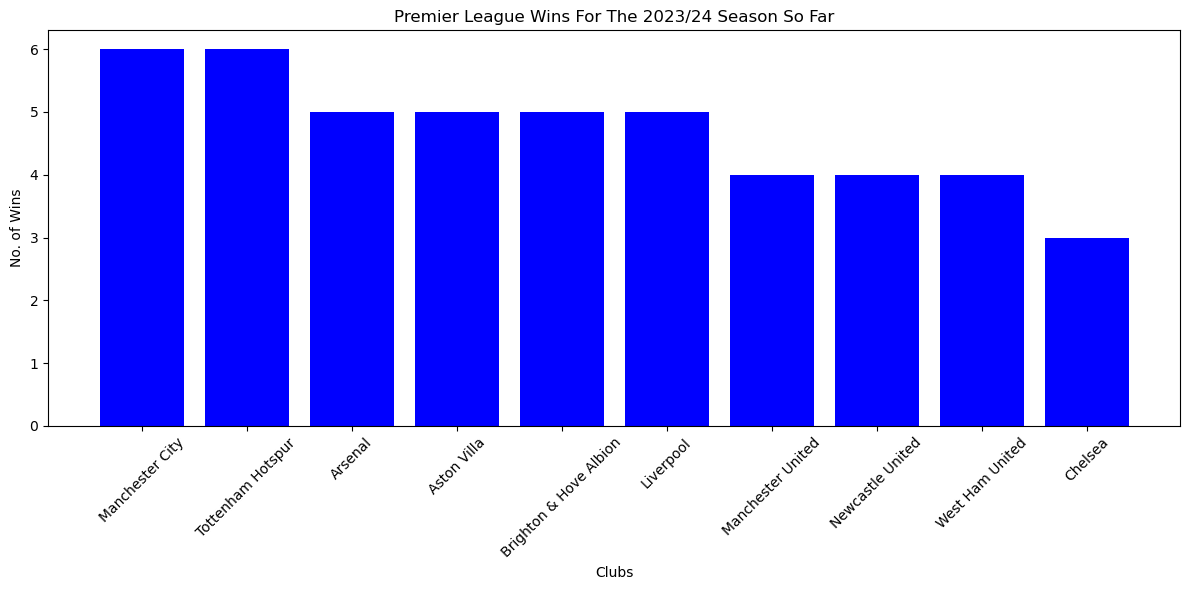

In [92]:
# Code for data visualization

import matplotlib.pyplot as plt

# Extract the data from the DataFrame
club_names = wins["Club"]

# Create a bar chart
plt.figure(figsize=(12, 6))  # I adjusted the figure size for a good fit
plt.bar(club_names, club_wins, color='blue')  
plt.xlabel('Clubs')
plt.ylabel('No. of Wins')
plt.title('Premier League Wins For The 2023/24 Season So Far')  # Customize the title as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # This ensures labels and titles fit within the figure

# Show the plot
plt.show()
